<a href="https://colab.research.google.com/github/sklmvansh/License-Plate-OCR/blob/main/OCR_Project_Licence_Plate_Reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **License Plate Detection and OCR using OpenCV and Tesseract**

In [ ]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import imutils

In [ ]:
import os
!sudo apt install tesseract-ocr
!pip install pytesseract
!mkdir tessdata
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
mkdir: cannot create directory ‘tessdata’: File exists
--2025-04-22 04:04:45--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata [following]
--2025-04-22 04:04:46--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata [following]
--2025-04-22 04:04:46--  https://raw.g

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -R /content/drive/MyDrive/CARs_Data  /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_image(img):
  fig = plt.gcf()
  fig.set_size_inches(16,8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
import imutils
def detect_plate(file_img):
  img = cv2.imread(file_img)
  (H,W) = img.shape[:2]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.bilateralFilter(gray, 11, 17, 17)
  edged = cv2.Canny(blur, 30 ,200)
  conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sorted(conts, key = cv2.contourArea, reverse=True)[:8]

  location = None
  for c in conts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
    if cv2.isContourConvex(approx):
      if len(approx) == 4:
        location = approx
        break

  beginX = beginY = endX = endY = None
  if location is None:
    plate = False
  else:
    mask = np.zeros(gray.shape,np.uint8)

    img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
    img_plate = cv2.bitwise_and(img, img, mask=mask)

    (y,x) = np.where(mask==255)
    (beginX, beginY) = (np.min(x), np.min(y))
    (endX, endY) = (np.max(x), np.max(y))

    plate = gray[beginY:endY, beginX:endX]

  return img, plate, beginX, beginY, endX, endY

In [ ]:
def ocr_plate(plate):
  config_tesseract = "--psm 6"
  os.environ["TESSDATA_PREFIX"] = "/content/tessdata/"
  text = pytesseract.image_to_string(plate, lang="eng", config=config_tesseract)
  text = "".join(character for character in text if character.isalnum())
  return text

In [ ]:
def recognize_plate(file_img):
  img, plate, beginX, beginY, endX, endY = detect_plate(file_img)

  if plate is False:
    print("It was not possible to detect plate")
    return 0

  text = ocr_plate(plate)
  print(text)
  img = cv2.putText(img, text, (beginX, beginY - 10), cv2.FONT_HERSHEY_COMPLEX, 0.9, (150,255,0), 2, lineType=cv2.LINE_AA)
  img = cv2.rectangle(img, (beginX, beginY), (endX, endY), (150, 255, 0), 2)
  show_image(img)

  return img, plate


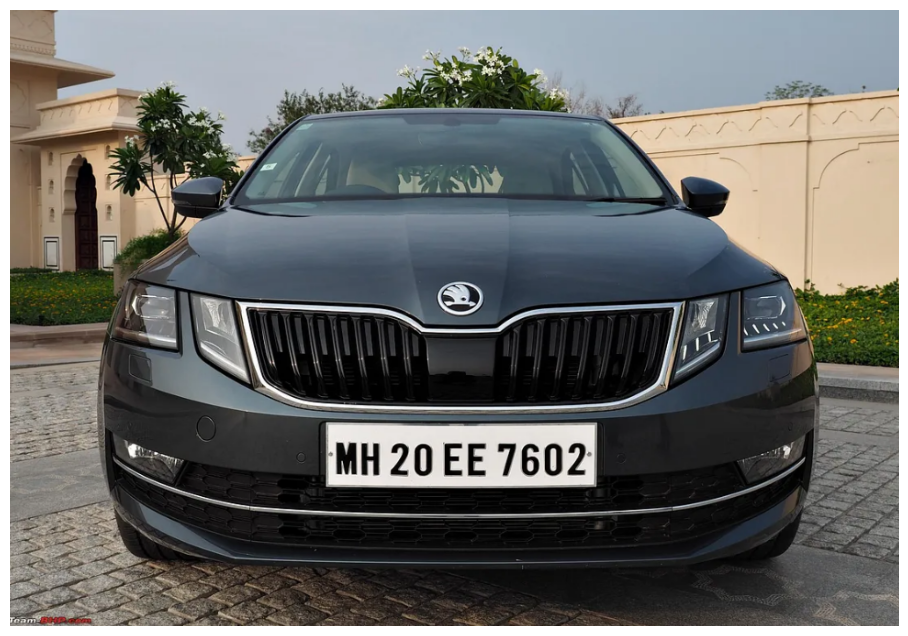

MH20EE7602


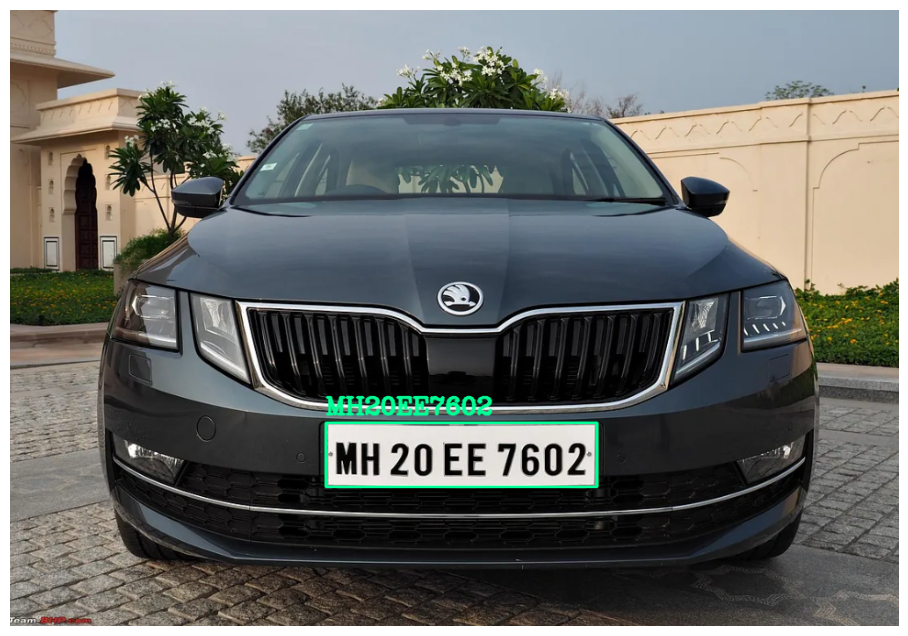

In [ ]:
image_path = '/content/drive/MyDrive/CARs_Data/CAR1.png'
unprocessed_img = cv2.imread(image_path)
show_image(unprocessed_img)
img, plate = recognize_plate(image_path)

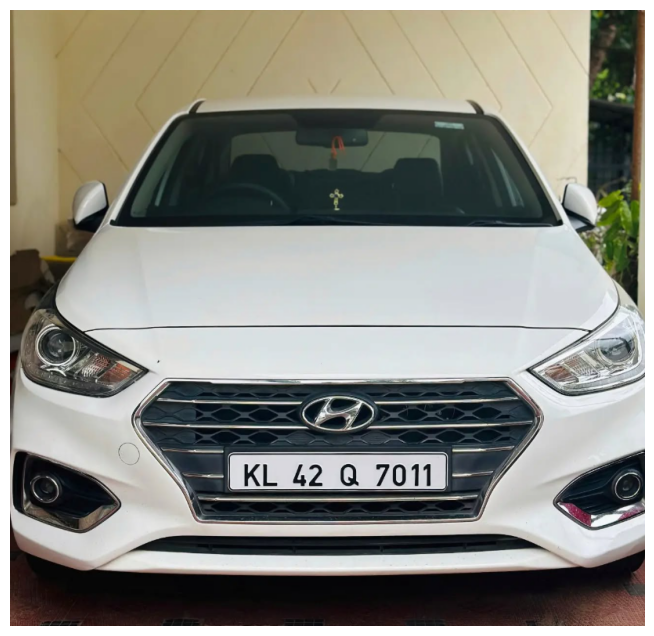

KL42Q7011


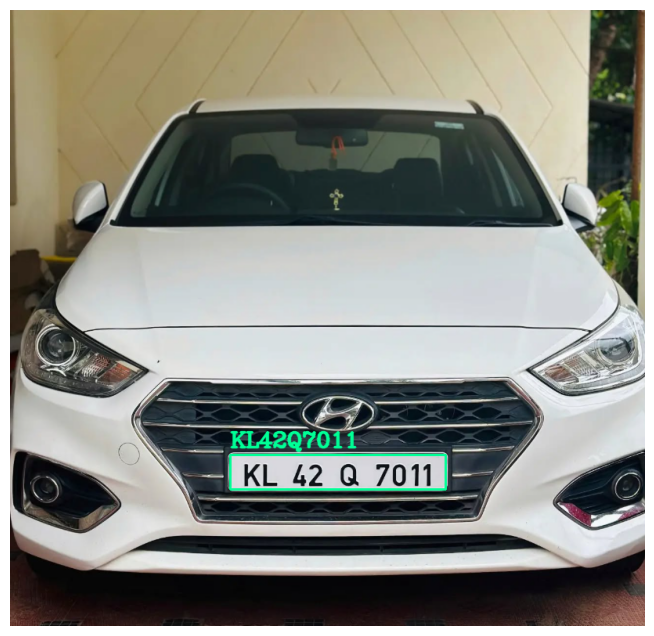

In [ ]:
image_path = '/content/drive/MyDrive/CARs_Data/CAR3.png'
unprocessed_img = cv2.imread(image_path)
show_image(unprocessed_img)
img, plate = recognize_plate(image_path)